# matplotlib exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Q1: planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [ ]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])

These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years

In [ ]:
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

Finally, the names of the planets corresponding to these are:

In [ ]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

In [ ]:
plt.plot(np.log(P), np.log(a))
plt.plot(np.log(P), np.log(a), 'o')
for i, txt in enumerate(names):
    plt.annotate(txt, (np.log(P[i])+0.2, np.log(a[i])-0.2))
#plt.axis('tight')
plt.axis('equal')
plt.xlim(-2, 8)
plt.ylim(-2, 4)
plt.xlabel("Log Periods")
plt.ylabel("Log Distances")

## Q2: drawing a circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:
$$
x = R\cos(\theta)
$$
$$ 
y = R\sin(\theta)
$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

In [ ]:
theta = np.linspace(0, 2*np.pi, 100)
r = 2

In [ ]:
theta

In [ ]:
x = r*np.cos(theta)
y = r*np.sin(theta)

In [ ]:
plt.plot(x,y)
plt.axis('equal')

## Q3: Circles, circles, circles...

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

In [ ]:
def draw_circle(x0, y0, R, color):
    theta = np.linspace(0, 2*np.pi, 100)
    x = x0 + R*np.cos(theta)
    y = y0 + R*np.sin(theta)
    plt.plot(x,y, color=color)
    plt.axis('equal')

In [ ]:
c = np.random.rand(10,3)
r = np.random.rand(10)
xy = np.random.rand(2,10)
for i in range(10):
    draw_circle(xy[0][i], xy[1][i], r[i], c[i])

## Q4: Climate

Use the data file of global surface air temperature averages `nasa-giss.txt`

(this data comes from: https://data.giss.nasa.gov/gistemp/graphs/)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the NumPy `where()` function useful.

In [2]:
data = np.loadtxt('nasa-giss.txt')

In [3]:
data[data[:,1]>0]

array([[ 1.940e+03,  8.000e-02,  5.000e-02],
       [ 1.941e+03,  1.300e-01,  9.000e-02],
       [ 1.942e+03,  1.000e-01,  1.100e-01],
       [ 1.943e+03,  1.300e-01,  1.100e-01],
       [ 1.944e+03,  2.500e-01,  9.000e-02],
       [ 1.945e+03,  1.200e-01,  6.000e-02],
       [ 1.952e+03,  1.000e-02, -7.000e-02],
       [ 1.953e+03,  8.000e-02, -7.000e-02],
       [ 1.957e+03,  4.000e-02, -4.000e-02],
       [ 1.958e+03,  7.000e-02, -1.000e-02],
       [ 1.959e+03,  3.000e-02,  1.000e-02],
       [ 1.961e+03,  5.000e-02,  2.000e-02],
       [ 1.962e+03,  3.000e-02, -0.000e+00],
       [ 1.963e+03,  6.000e-02, -2.000e-02],
       [ 1.969e+03,  7.000e-02, -2.000e-02],
       [ 1.970e+03,  2.000e-02, -0.000e+00],
       [ 1.972e+03,  1.000e-02, -0.000e+00],
       [ 1.973e+03,  1.500e-01, -1.000e-02],
       [ 1.977e+03,  1.800e-01,  7.000e-02],
       [ 1.978e+03,  7.000e-02,  1.200e-01],
       [ 1.979e+03,  1.700e-01,  1.700e-01],
       [ 1.980e+03,  2.700e-01,  2.000e-01],
       [ 1

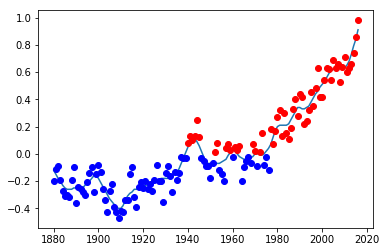

In [4]:
plt.plot(data[:,0], data[:,2])
blue = data[data[:,1]<0]
red = data[data[:,1]>0]
plt.plot(blue[:,0], blue[:,1], 'bo')
plt.plot(red[:,0], red[:,1], 'ro')

## Q5: subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplot()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


In [ ]:
plt.subplot(311)
x = np.linspace(0, 2*np.pi, 100)
plt.plot(x, np.sin(x))



plt.subplot(312)
f = np.sin(x)
dx = x[1] - x[0]
dfdx = (f[1:] - f[:-1])/dx
plt.plot(x[1:], dfdx)
dfdx2 = (dfdx[1:] - dfdx[:-1])/dx
plt.subplot(313)
plt.plot(x[2:], dfdx2)

## Q7: Double Star Orbital Plot

Use the data file of Sirius AB observation from Bosscha Observatory `sirius.csv`.

There are 3 columns here: the year (epoch), angular separation $\rho$, and position angle $\theta$.  

* Plot orbit of Sirius on a polar coordinate

```ax = plt.subplot(111, projection='polar')```

Given orbital elements: $P = 50.1284$ years, $T = 1994.5715$, $a = 7.4957$ arcsec, $e = 0.59142$, $i = 136.336$ deg, $\Omega = 45.4$ deg, $\omega = 149.161$ deg
* Compute $\rho$ and $\theta$ from year 1900 to 1950 and plot the results
* Extra point if you can plot the error of observation data from the model

Example:

<img src="06408S1635 AGC 1 5423.0 AB Sirio.svg">

### Hint: Ephemeris Formulae
For any time $t$, the coordinates $θ$, $ρ$ or $x$, $y$ are computed from the elements by means of the following formulae. The auxiliary circle has radius $a$. 
The angle $E$ is called the eccentric anomaly and has to be determined from the mean anomaly $M$:

$\mu(t-T) = M = E- \sin E$ (Kepler's Equation)

This equation is transcendental, i.e. it is not algebraic and has to be solved iteratively. A first approximation is given by the formula:

$E_0 = M + e \sin M + \frac{e^2}{M} \sin2M$

This new $E_0$ is used to calculate a new $M_0$:

$M_0 = E_0 – e \sin E_0$

A new $E_1$ is obtained from $M$, $M_0$ and $E_0$:

$E_1 = E_0 + \frac{M-M_0}{1-e \cos E_0}$

The last two formulae are iterated to the desired accuracy. Four iterations are sufficient for e ≤ 0.95. Now the desired positions are calculated.
Polar coordinates:

$\tan \frac{v}{2} = \sqrt{\frac{1+e}{1-e}} \tan \frac{E}{2}$

$r = \frac{a(1-e^2)}{1+e \cos v}$

$\tan(\theta - \Omega) = \tan (v + \omega) \cos i$

$\rho = r \cos (v + \omega) \sec(\theta-\Omega)$